In [1]:
import scanpy as sc
sc.settings.set_figure_params(figsize=(4, 4))
import pandas as pd
import numpy as np

In [2]:
adata = sc.read_h5ad("../../data/30_merge_adata/adata_scvi.h5ad")

In [3]:
sc.pp.neighbors(adata, use_rep="X_scVI")

In [4]:
sc.tl.leiden(adata, resolution=.5)

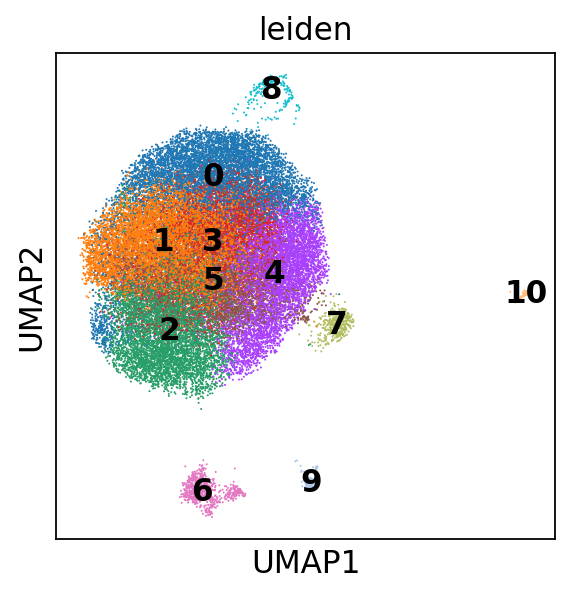

In [5]:
sc.pl.umap(adata, color="leiden", legend_loc="on data")

In [6]:
adata.obs["cell_type"] = ["malignant B cell" if clus in ["0", "1", "3", "5", "4", "2"] else "other" for clus in adata.obs["leiden"]]

... storing 'cell_type' as categorical


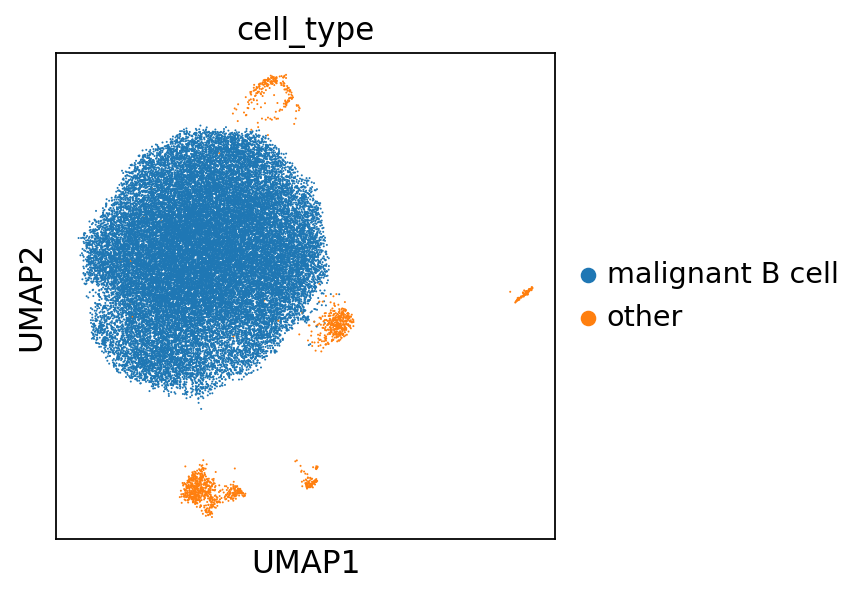

In [7]:
sc.pl.umap(adata, color="cell_type")

In [8]:
adata_de = adata[adata.obs["cell_type"] == "malignant B cell", :]

In [9]:
adata.obs

,patient,timepoint,sample,n_genes_by_counts,total_counts,total_counts_mito,pct_counts_mito,n_counts,n_genes,patient_id,sex,age,ethnicity,response,leiden,cell_type
cell_id,,,,,,,,,,,,,,,,
640756_0,P1,T1,HCL_P1_T1,3463,12609.0,2520.0,19.985725,12609.0,3463,P1,female,85,caucasian,short_term,8,other
646419_0,P1,T1,HCL_P1_T1,2757,11779.0,2893.0,24.560659,11779.0,2757,P1,female,85,caucasian,short_term,0,malignant B cell
825469_0,P1,T1,HCL_P1_T1,2607,10887.0,3520.0,32.332142,10887.0,2607,P1,female,85,caucasian,short_term,1,malignant B cell
818696_0,P1,T1,HCL_P1_T1,2604,10103.0,3070.0,30.387014,10103.0,2604,P1,female,85,caucasian,short_term,4,malignant B cell
41552_0,P1,T1,HCL_P1_T1,2383,9685.0,2996.0,30.934435,9685.0,2383,P1,female,85,caucasian,short_term,4,malignant B cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133321_11,P5,T0,HCL_P5_T0,780,2036.0,800.0,39.292732,2036.0,780,P5,male,56,caucasian,long_term,5,malignant B cell
222098_11,P5,T0,HCL_P5_T0,750,2130.0,723.0,33.943661,2130.0,750,P5,male,56,caucasian,long_term,2,malignant B cell
717041_11,P5,T0,HCL_P5_T0,995,2009.0,15.0,0.746640,2009.0,995,P5,male,56,caucasian,long_term,1,malignant B cell


In [10]:
bulk_samples = {}
for sample in adata.obs["sample"].unique():
    bulk_samples[sample] = pd.Series(np.sum(adata[adata.obs["sample"] == sample, :].layers["raw_counts"], axis=0).A1, index=adata.var_names)

In [11]:
bulk_df = pd.DataFrame(bulk_samples)
bulk_df.index.name="gene_id"
bulk_df.reset_index(inplace=True)
bulk_df.insert(1, "gene_name", bulk_df["gene_id"])

In [12]:
bulk_df

,gene_id,gene_name,HCL_P1_T1,HCL_P1_T2,HCL_P3_T2,HCL_P2_T0,HCL_P4_T0,HCL_P6_T0,HCL_P3_T0,HCL_P2_T1,HCL_P2_T2,HCL_P3_T1,HCL_P5_T0
0,A1BG,A1BG,20.0,3.0,268.0,15.0,138.0,267.0,62.0,8.0,11.0,265.0,213.0
1,A1BG-AS1,A1BG-AS1,17.0,2.0,212.0,43.0,173.0,252.0,51.0,37.0,34.0,273.0,266.0
2,A1CF,A1CF,1.0,0.0,1.0,2.0,2.0,3.0,1.0,2.0,3.0,4.0,1.0
3,A2M,A2M,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
4,A2M-AS1,A2M-AS1,0.0,0.0,0.0,4.0,12.0,6.0,4.0,1.0,0.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17176,ZXDC,ZXDC,51.0,3.0,687.0,152.0,422.0,543.0,117.0,102.0,112.0,755.0,626.0
17177,ZYG11A,ZYG11A,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
17178,ZYG11B,ZYG11B,53.0,10.0,1118.0,576.0,620.0,957.0,165.0,350.0,407.0,1186.0,781.0
17179,ZYX,ZYX,260.0,33.0,3199.0,785.0,2356.0,3446.0,810.0,593.0,540.0,4615.0,5370.0


In [13]:
bulk_df.loc[bulk_df["gene_id"].str.startswith("AC"), :]

,gene_id,gene_name,HCL_P1_T1,HCL_P1_T2,HCL_P3_T2,HCL_P2_T0,HCL_P4_T0,HCL_P6_T0,HCL_P3_T0,HCL_P2_T1,HCL_P2_T2,HCL_P3_T1,HCL_P5_T0
95,AC000058.1,AC000058.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,AC000068.1,AC000068.1,0.0,0.0,4.0,1.0,2.0,2.0,0.0,0.0,0.0,4.0,1.0
97,AC000068.2,AC000068.2,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,3.0,7.0
98,AC000403.1,AC000403.1,1.0,0.0,34.0,16.0,12.0,9.0,8.0,7.0,12.0,52.0,22.0
99,AC002074.1,AC002074.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,ACVR2B-AS1,ACVR2B-AS1,2.0,0.0,14.0,1.0,2.0,4.0,1.0,2.0,3.0,4.0,4.0
1589,ACY1,ACY1,0.0,0.0,4.0,0.0,1.0,3.0,0.0,0.0,1.0,7.0,6.0
1590,ACY3,ACY3,105.0,9.0,434.0,22.0,108.0,1118.0,99.0,21.0,11.0,701.0,300.0
1591,ACYP1,ACYP1,21.0,1.0,231.0,98.0,123.0,198.0,57.0,80.0,74.0,256.0,170.0


In [14]:
bulk_df["gene_id"].unique().size

17181

In [15]:
deseq_sample_sheet = adata.obs.loc[:, ["sample", "response", "sex", "age"]].sort_values("sample").drop_duplicates()
deseq_sample_sheet

,sample,response,sex,age
cell_id,,,,
640756_0,HCL_P1_T1,short_term,female,85
1406_1,HCL_P1_T2,short_term,female,85
212794_3,HCL_P2_T0,short_term,male,73
198937_8,HCL_P2_T1,short_term,male,73
737160_9,HCL_P2_T2,short_term,male,73
710244_7,HCL_P3_T0,short_term,male,75
792995_10,HCL_P3_T1,short_term,male,75
321587_2,HCL_P3_T2,short_term,male,75
290657_5,HCL_P4_T0,long_term,female,67


In [16]:
deseq_sample_sheet.to_csv("../../data/40_de_analysis/deseq_samplesheet.csv", index=False)
bulk_df.to_csv("../../data/40_de_analysis/bulk_df.tsv",sep="\t", index=False)